### Student Information
Name:林維哲

Student ID:108164503

GitHub ID:kim2525

Kaggle name:mimoei

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM19-Lab2-Master Repo](https://github.com/EvaArevalo/DM19-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/179d01d4dd984fc5ac45a894822479dd) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the score (ie. 20% of 30% )

    - **Top 41% - 100%**: Get (101-x)% of the score, where x is your ranking in the leaderboard (ie. (101-x)% of 30% )   
    Submit your last submission __BEFORE the deadline (Nov. 23rd 11:59 pm, Saturday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/EvaArevalo/DM19-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb), but make sure to fork the [DM19-Lab2-Homework](https://github.com/EvaArevalo/DM19-Lab2-Homework) repository this time! Also please __DON´T UPLOAD HUGE DOCUMENTS__, please use Git ignore for that.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 26th 11:59 pm, Tuesday)__. 

## First part of Homework

In [5]:
import pandas as pd

train_df = pd.read_pickle("train_df.pkl") 
test_df = pd.read_pickle("test_df.pkl")

---
### ** >>> Exercise 1 (Take home): **  

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
#count training set's frenquncy
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(train_df['text'])
x_data = count_vect.get_feature_names()
term_frequencies = []
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
y_data = []
x_data = []
for i in range(train_df.shape[0]):
    if(term_frequencies[i] > 3):
        x_data.append(count_vect.get_feature_names()[i])
        y_data.append(term_frequencies[i])
train_sorted = [x for y, x in sorted(zip(y_data, x_data), reverse = True)]
count_vect = CountVectorizer()

#count testing set's frenquncy
X_counts = count_vect.fit_transform(test_df['text'])
x_data = count_vect.get_feature_names()
term_frequencies = []
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
y_data = []
x_data = []
for i in range(test_df.shape[0]):
    if(term_frequencies[i] > 3):
        x_data.append(count_vect.get_feature_names()[i])
        y_data.append(term_frequencies[i])
test_sorted = [x for y, x in sorted(zip(y_data, x_data), reverse = True)]
print("train data Top 30 words:\n", train_sorted[:30],"\n")
print("-"*100)
print("test data Top 30 words:\n", test_sorted[:30],"\n")

train data Top 30 words:
 ['and', 'for', 'be', 'but', 'at', 'can', 'all', 'are', 'don', 'about', 'amp', 'from', 'by', 'do', 'as', 'an', 'day', 'been', 'back', 'feel', 'because', 'always', 'amazing', 'being', 'am', 'after', 'even', 'did', 'fear', 'ever'] 

----------------------------------------------------------------------------------------------------
test data Top 30 words:
 ['and', 'be', 'can', 'at', 'all', 'are', 'but', 'an', 'about', 'by', 'am', 'been', 'amp', 'awful', 'before', 'anger', 'because', 'always', 'again', 'cheerful', 'blues', 'being', 'back', 'away', 'as', 'afraid', 'burning', 'black', 'best', 'business'] 



---
### ** >>> Exercise 2 (Take home): **  

In [8]:
# Answer here
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)
X = vectorizer.fit(train_df['text'])
feature_names = vectorizer.get_feature_names()
feature_names[100:110]

['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc', 'bday']

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

## Answer here
I will say that fear is an emotion that easy to be confused by anger and sadness.
And joy is the easist emotion to be classify.

## Create some vectorizer here for naive bayes classifier

In [10]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape
# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [13]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

In [11]:
# Answer here
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)
print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))
print(classification_report(y_true=y_test, y_pred=y_test_pred))

training accuracy: 0.79
testing accuracy: 0.72
              precision    recall  f1-score   support

       anger       0.71      0.65      0.68        84
        fear       0.74      0.83      0.78       110
         joy       0.76      0.71      0.73        79
     sadness       0.65      0.64      0.64        74

   micro avg       0.72      0.72      0.72       347
   macro avg       0.71      0.71      0.71       347
weighted avg       0.72      0.72      0.72       347



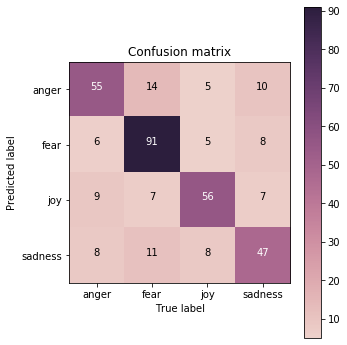

In [14]:
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

## Answer here
Naive Bayes model preform better than Decision Tree model. 

I think the most important reason cause this difference is because Decission Tree maybe overfitting. 

And in this case it actually overfitting which get 99% accuracy on training set but only 64% accuracy on testing set.

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

Training accuracy get higher and loss get lower through the epoch, 
but validation accuracy and validation loss doesn't perform good through epoch.
This is because when it is after 2 eopch it overfit and validation set can't perform as good as training set.
Befor the 2 epoch is underfitting since model doesn't learn enough information from training set so the vlaidation accuracy
and training accuracy are both low.

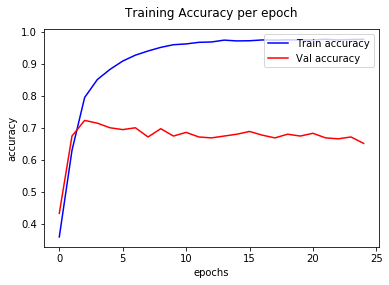

In [16]:
# Answer here
import matplotlib.pyplot as plt
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
plt.plot(training_log['epoch'],training_log['acc'], color = 'b', label="Train accuracy")
plt.plot(training_log['epoch'],training_log['val_acc'], color = 'r', label="Val accuracy")
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.title("Training Accuracy per epoch",  x=0.5, y=1.03)
plt.legend(loc='upper right',fontsize=10)
plt.show()

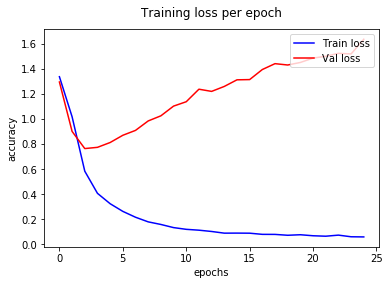

In [17]:
plt.plot(training_log['epoch'],training_log['loss'], color = 'b', label="Train loss")
plt.plot(training_log['epoch'],training_log['val_loss'], color = 'r', label="Val loss")
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.title("Training loss per epoch",  x=0.5, y=1.03)
plt.legend(loc='upper right',fontsize=10)
plt.show()

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


## Answer here
we can utlize some NN model that use sequence as input such as RNN, Transformer to deal with our word vector


In [18]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).
## Answer here

In [19]:

word_list = ['happy', 'angry', 'sad', 'fear']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
mining_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

##print('happy_words: ', happy_words)
##print('angry_words: ', angry_words)
##print('sad_words: ', data_words)
##print('fear_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
##print('\ntarget words: ')
##print(target_words)

##print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
##print(color)
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

NameError: name 'w2v_google_model' is not defined

## kaggle report

After I evaluate the data, I first try sending the result with label "joy". I got 30% of accuracy, so I think 30% may be the baseline of this competition.

Second I try to use logistic regresion, with input is Tfidf of 20000 features. This got about 45% accuracy. It seems that Tfidf is really powerful is this case.

Third I try to utilize BERT classification model.I do some preprocessing like eliminate some symbol like "...", "!!!", since the input of bert is constraint by 512. And also I create multiple mask and add some token into data to meet the format of bert.
Because of really large training data, I only run 1 eopch. It take about 6 hours to train it. But since bert is a well-trained language model, and most of the work is doing finetuning, so 1 epoch may be fine. 
I got 48% of accuracy from bert.